# ZOOM IN IMAGES


*   Mykola Liashuha
*   Jose Gonzalez Lopez



## INTRODUCTION
This notebook will perform a spectral analysis of a photography with having the goal to make certain operations with the Fourier Transform. We will resize the image with a smaller scale in the Space and Fourier domains and we will get a bigger scale using Sinc and Linear interpolation respectively. In the end we will draw our conclusions of the project.

## IMPORTS

In [1]:
import cv2 #Read images and do operations
import numpy as np #Operations
from matplotlib import pyplot as plt #Ploting
from scipy import fftpack #Fourier transforming

## AUXILIAR FUNCTIONS

In [2]:
'''
Plots the spectrum of a fourier domain image
'''
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

## THE DATA
First we will start by opening the files and do a simple scan to see the main properties of the images that we are going to resize and study.

In [3]:
img = cv2.imread('barbara.jpg') #Reading
height,width,_ = img.shape #Getting essential features of image

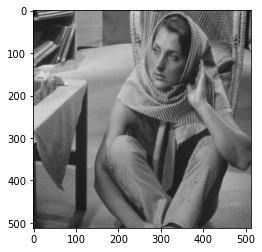

In [4]:
plt.imshow(img)

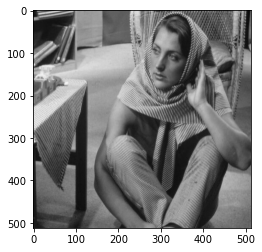

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


# SMALLER IMAGE

## SUBSAMPLING IN SPACE DOMAIN
To resize the image by sumsampoling in the space domain, we will just get half of the points of the original image and do some linear interpolation.

Size of resized image: (256, 256)


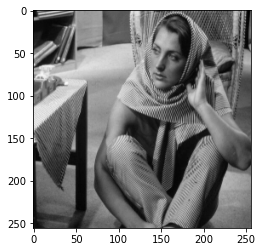

In [10]:
points=(int(width/2), int(height/2)) #We prepare the points for the interpolation, half size
img_sampl = cv2.resize(gray, points, interpolation= cv2.INTER_LINEAR) #And resize with linear interpolation
print('Size of resized image:', img_sampl.shape)
plt.figure() #Make figure
plt.imshow(img_sampl,cmap='gray') #Plot
plt.show() #Show the image

As we can see the image was resized with half of the points

## FOURIER TRANSFORM
Let's apply the Fourier Transform to the image after converting it to a greyscale image.

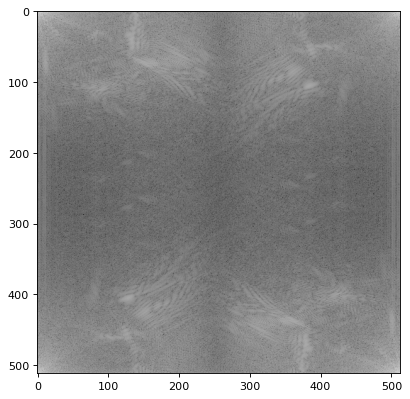

In [20]:
dark_image_grey_fourier = np.fft.fft2(gray) #Apply Fourier transform

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray'); #We want grey values
plt.show()

After getting the fourier map of the original image, it is time to do the transformation.

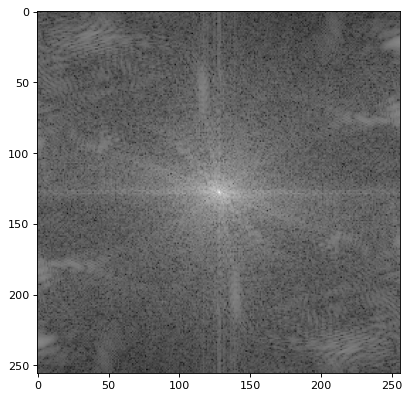

In [21]:
dark_image_grey_fourier = np.fft.fft2(gray) #Same as befor, so the transformation
dark_image_grey_fourier = np.fft.fftshift(dark_image_grey_fourier) #Shift

dark_image_grey_fourier = dark_image_grey_fourier[128:384, 128:384] #Get half of the points

#Plot
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

And now we do the inverse process and get back to the space domain.

Size of reconstructed image: (256, 256)


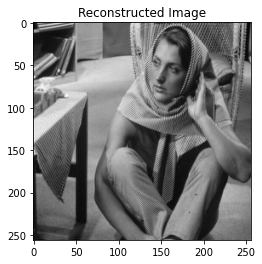

In [22]:
im_new = fftpack.ifft2(np.fft.ifftshift(dark_image_grey_fourier)).real

print('Size of reconstructed image:', im_new.shape)

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
plt.show()

# BIGGER IMAGE

## SINC INTERPOLATION
To do the sinc interpolation, we will create a new image with double size with zero padding in the fourier domain. Then we will shift it to the new size and reconstruct the image into the space domain.

/home/mykola/anaconda3/envs/nets/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Text(0.5, 1.0, 'Padding + Fourier transform')

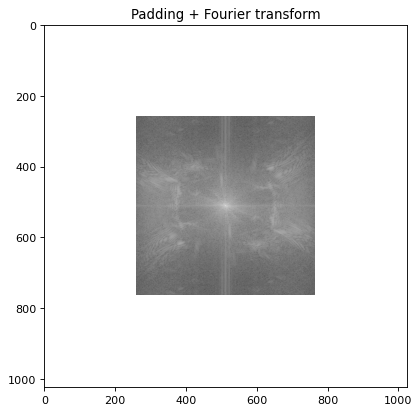

In [11]:
dark_image_grey_fourier = np.fft.fft2(gray) #Transform
dark_image_grey_fourier = np.fft.fftshift(dark_image_grey_fourier) #Shift

sample = np.zeros((1024, 1024), dtype=dark_image_grey_fourier.dtype) #Padding
sample[256:768, 256:768] = dark_image_grey_fourier
dark_image_grey_fourier = sample

plt.figure(num=None, figsize=(8, 6), dpi=80) #Plot the padding + fourier transform
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
plt.title('Padding + Fourier transform')

Size of reconstructed image: (1024, 1024)


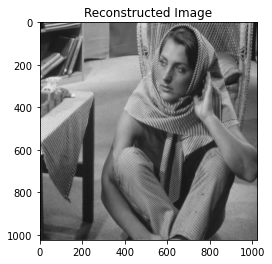

In [13]:
im_new = fftpack.ifft2(np.fft.ifftshift(dark_image_grey_fourier)).real #Reconstruct

print('Size of reconstructed image:', im_new.shape)

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
plt.show()

## LINEAR INTERPOLATION
For the linear interpolation, we will just resize the image in the space domain and use the cv2 library to do the operations for us.

Size of resized image: (1024, 1024, 3)


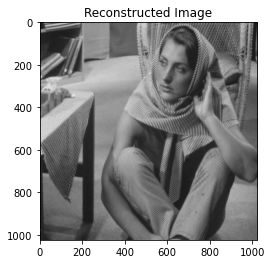

In [14]:
points=(2*width, 2*height) #We prepare the points for the interpolation, double size
img_linear = cv2.resize(img, points, interpolation= cv2.INTER_LINEAR) #And resize with linear interpolation

print('Size of resized image:', img_linear.shape)


plt.figure() #Plot
plt.imshow(img_linear)
plt.title('Reconstructed Image')
plt.show()

# CONCLUSIONS

In this exercise we applied different operations to rescale an image in the Space and Fourier domains to put in practise the general concepts of Fourier operations.